In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# =====================
# Data Preprocessing
# =====================
data = pd.read_csv('Medical_insurance.csv')

# Encode categorical columns
for col in ['sex', 'smoker', 'region']:
    data[col] = LabelEncoder().fit_transform(data[col])



# Features & target
X = data.drop('charges', axis=1)
y = data['charges']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# =====================
# Model Architecture
# =====================
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dense(1)  # regression output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# =====================
# Callbacks
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-5)

# =====================
# Training
# =====================
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,   # better than 10
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# =====================
# Evaluation
# =====================
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Epoch 1/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 319808832.0000 - mae: 13276.6270 - val_loss: 330591296.0000 - val_mae: 13204.0664 - learning_rate: 0.0010
Epoch 2/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 316822464.0000 - mae: 13229.8008 - val_loss: 328372256.0000 - val_mae: 13170.9541 - learning_rate: 0.0010
Epoch 3/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309778720.0000 - mae: 13115.8721 - val_loss: 322035168.0000 - val_mae: 13073.5322 - learning_rate: 0.0010
Epoch 4/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 297071552.0000 - mae: 12887.4395 - val_loss: 308902944.0000 - val_mae: 12849.0518 - learning_rate: 0.0010
Epoch 5/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 277407008.0000 - mae: 12488.4824 - val_loss: 285693248.0000 - val_mae: 12409.4600 - learning_rate: 0.0010
Epoch 6/300
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 250121008.0000 - mae: 11893.4512 - val_loss: 251404704.0000 - val_mae: 11672.2930 - learning_rate: 0.0010
Epoch 7/30

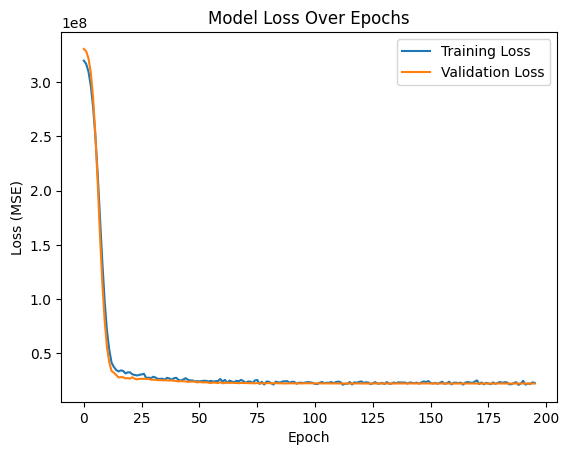

<Figure size 640x480 with 0 Axes>

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()
plt.savefig('loss_curve.png')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE: 2433.5384503913765
RMSE: 4709.691491655081
R² Score: 0.8582386747447569


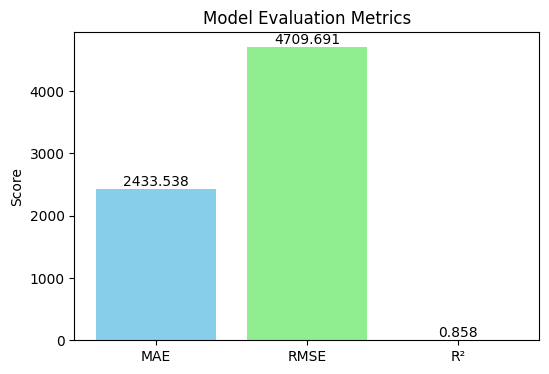

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

# ============================
# 📊 Bar Chart of Metrics
# ============================
metrics = ['MAE', 'RMSE', 'R²']
values = [mae, rmse, r2]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3),
             ha='center', va='bottom')

plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()


In [101]:

plt.savefig('loss_curve.png')

<Figure size 640x480 with 0 Axes>

In [106]:
model.save('insurance_model.h5')


In [109]:
# Model Accuracy Analysis
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("=== MODEL ACCURACY METRICS ===")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Testing MAE: ${test_mae:.2f}")
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Testing RMSE: ${test_rmse:.2f}")
print(f"\nR² Score Interpretation:")
print(f"- Training: {train_r2*100:.1f}% of variance explained")
print(f"- Testing: {test_r2*100:.1f}% of variance explained")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
=== MODEL ACCURACY METRICS ===
Training R² Score: 0.8875
Testing R² Score: 0.8582
Training MAE: $2114.06
Testing MAE: $2433.54
Training RMSE: $4021.88
Testing RMSE: $4709.69

R² Score Interpretation:
- Training: 88.8% of variance explained
- Testing: 85.8% of variance explained


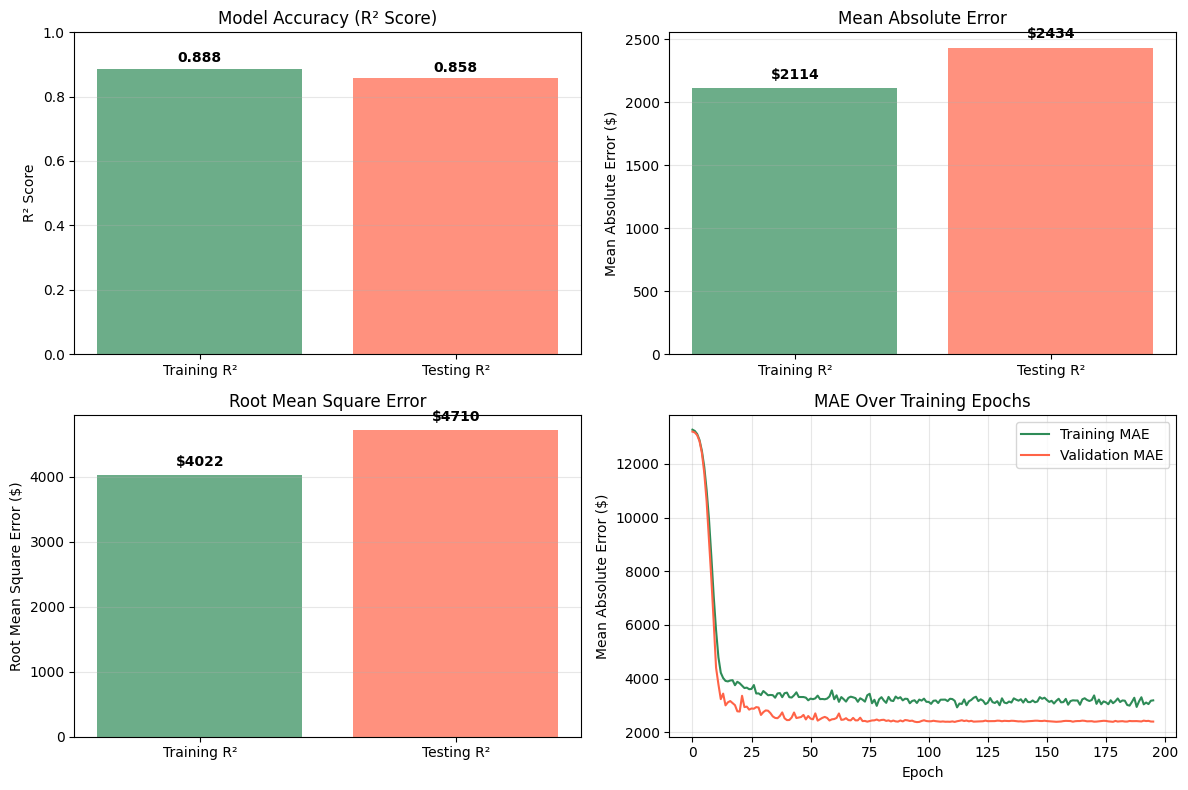

In [110]:
# Accuracy Visualization - R² Score Over Epochs
plt.figure(figsize=(12, 8))

# Plot 1: R² Score comparison
plt.subplot(2, 2, 1)
metrics = ['Training R²', 'Testing R²']
r2_scores = [train_r2, test_r2]
colors = ['#2E8B57', '#FF6347']
bars = plt.bar(metrics, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Model Accuracy (R² Score)')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 2: MAE Comparison
plt.subplot(2, 2, 2)
mae_scores = [train_mae, test_mae]
bars = plt.bar(metrics, mae_scores, color=colors, alpha=0.7)
plt.ylabel('Mean Absolute Error ($)')
plt.title('Mean Absolute Error')
for i, v in enumerate(mae_scores):
    plt.text(i, v + 50, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 3: RMSE Comparison
plt.subplot(2, 2, 3)
rmse_scores = [train_rmse, test_rmse]
bars = plt.bar(metrics, rmse_scores, color=colors, alpha=0.7)
plt.ylabel('Root Mean Square Error ($)')
plt.title('Root Mean Square Error')
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 100, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Plot 4: MAE over epochs (from training history)
plt.subplot(2, 2, 4)
plt.plot(history.history['mae'], label='Training MAE', color='#2E8B57')
plt.plot(history.history['val_mae'], label='Validation MAE', color='#FF6347')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error ($)')
plt.title('MAE Over Training Epochs')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


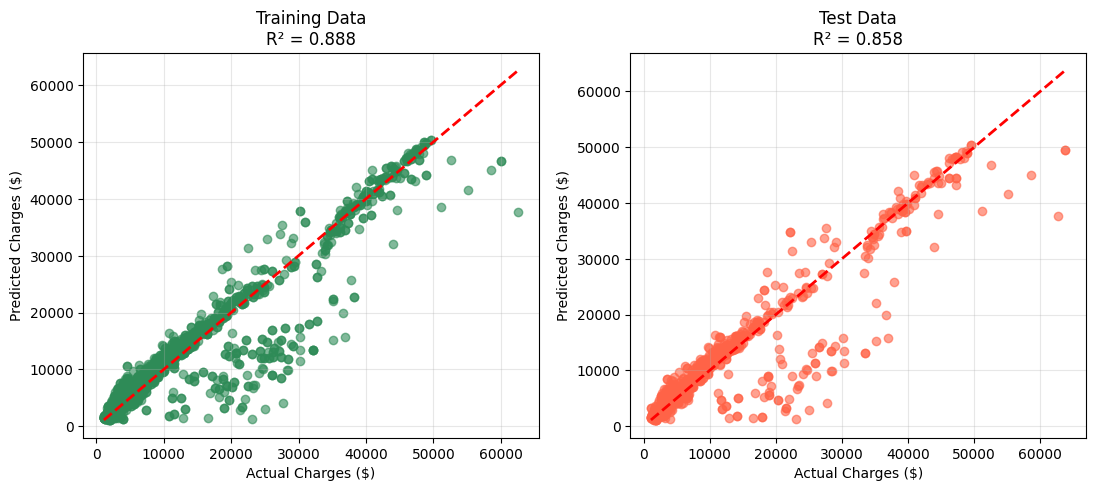

In [111]:
# Prediction vs Actual Scatter Plot
plt.figure(figsize=(20, 5))

# Training data predictions
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='#2E8B57')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title(f'Training Data\nR² = {train_r2:.3f}')
plt.grid(alpha=0.3)

# Test data predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='#FF6347')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title(f'Test Data\nR² = {test_r2:.3f}')
plt.grid(alpha=0.3)



#save the plot
plt.savefig('prediction_vs_actual.png')
